**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
import pandas as pd #til opgave 2
import matplotlib.pyplot as plt #til opgave 2
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [ ]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [2]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We want to calculate the mean value of the utility across all simulations for each career choice and the average experienced utility across all simulations for each career choice. 

We will follow this structure:
1. Simulation of the error terms.
2. Calculating the expected utility.
3. Calculating the average realized utility.
4. Displaying the results.


In [3]:
#Step 1: Simulation of the error terms.
#We set the seed to 2000 to ensure reproducibility of the random numbers.
np.random.seed(2000) 
#Now, we generate an array of numbers from a normal distribution with mean 0 and standard deviation par.sigma, which is 2.
#The shape of the array is par.J, par.K, which means that the array of numbers has 3 rows and 10000 columns: one for each
#career track and one for each simulation.
array_numbers = np.random.normal(0, par.sigma, (par.J, par.K))

In [4]:
#Step 2: Calculating the expected utility.
#We start by creating an array that stores the expected utility for each career track.
#The array is initialized with zeros and has a length of the array par.J.
expected_utility = np.zeros(par.J)

#Now we loop through each career track to calculate the expected utility.
for j in range(par.J):
    #We calculate the expected utility for career choice j.
    #par.v[j] is the utility value for career choice j.
    #np.mean(array_numbers[j, :]) calculates the mean of the error terms for career choice j across all simulations.
    expected_utility[j] = par.v[j] + np.mean(array_numbers[j, :])

In [5]:
#Step 3: Calculating the average realized utility.
#We create an array of utility values for each career choice.
#We reshape par.v from a 1D array into a 2D array (3, 1) so we can add the array_numbers array by matching the dimensions correctly.
#Each utility value (1, 2, or 3) is added to the corresponding error terms across all simulations.
realized_utility = par.v.reshape((par.J, 1)) + array_numbers
#We now calculate the average realized utility. np.mean(realized_utility, axis=1) calculates the mean of realized_utility across 
#all 10000 simulations for each career choice..
average_realized_utility = np.mean(realized_utility, axis=1)

In [6]:
#Step 4: Displaying the results.
for j in range(par.J):
    print(f"Career choice {j+1}:")
    print(f"  Expected Utility: {expected_utility[j]:.3f}")
    print(f"  Average Realized Utility: {average_realized_utility[j]:.3f}")

Career choice 1:
  Expected Utility: 1.003
  Average Realized Utility: 1.003
Career choice 2:
  Expected Utility: 1.989
  Average Realized Utility: 1.989
Career choice 3:
  Expected Utility: 3.003
  Average Realized Utility: 3.003


**Conclusion**:

Graduates rank the career tracks in terms of utility as follows: Career track 3 > career track 2 > career track 1 based on both their expectations and their actual experiences indicating a clear preference for career track 3.

The results show that for each career choice, the expected utility and average realized utility are very close to the base utility values (1, 2, and 3) respectively. This is due to the error terms having an average of zero - therefore they don't change the base utility values much and when using 10000 simulations it helps average out any random fluctuations, making the results stable. 

The expected utility for each career choice represents the average utility that graduates anticipate receiving from choosing a specific career track. This is calculated based on the known utility values of the career tracks and the simulated influence of friends' utilities. It reflects the graduates' perceptions or predictions about how beneficial each career track will be before they make their decision. 

The average realized utility for each career choice represents the actual utility that graduates experience after choosing a specific career track. This includes the inherent utility of the career track and the graduate's own random variations in utility. It shows the true benefits that graduates receive from their chosen career tracks, accounting for the randomness and variability in real-life outcomes.

The close match between expected utility and average realized utility implies that the graduates' decision-making process is effective, as their expectations are based on accurate assessments of the career tracks and they can make informed decisions based on their expectations, knowing that their actual experiences are likely to match these expectations.


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We want to simulate and visualize the decision-making process of graduates when choosing their careers by understanding: a) or each type of graduate, the proportion of times they choose each career track across multiple simulations, b) for each type of graduate, the average expected utility they perceive for the career track they choose, considering the influence of their friends and c) for each type of graduate, the actual utility they experience for the career track they choose, accounting for random variations. 

We wil follow this structure:
1. Simulation of the error terms
2. Calculating the expected utility
3. Caculating the averages
4. Displaying the results
5. Illustration of the results

In [17]:
#We start by creating numpy arrays to store the results of the simulations of the following:
#The career choices array: Each row corresponds to a graduate, and each column corresponds to a career track.
career_choices = np.zeros((par.N, par.J))
expected_utilities = np.zeros((par.N, par.J))
realized_utilities = np.zeros((par.N, par.J))

#Step 1: Simulation of the error terms
#We set the seed to 2000 to ensure reproducibility of the random numbers.
np.random.seed(2000)

In [18]:
#Step 2: Calculating the expected utility.
#We start by making a loop over all graduates. Then we can iterate over all graduates to simulate their career choices and 
#calculate the utilites.
for i in range(par.N):
    #We now make a nested loop for the number of simulations.
    for k in range(par.K):
        #We now simulate the influence of friends' utilities, which affects the graduate's expected utility calculation.
        #par.F[i] specifies the number of friends the i'th graduate has in each career and par.J specifies the number of career tracks.
        friends = np.random.normal(0, par.sigma, (par.F[i], par.J))
        
        #Now we estimate the expected utility based on friends' influences and the inherent utility of each career track.
        #It adds the known utility values (par.v) to the average noise from friends.
        utility_first = par.v + friends.mean(axis=0)
        
        #We simulate the graduate's individual variation in utility for each career track with random noise for 
        #the graduate's own utility for each career track.
        utility_variation = np.random.normal(0, par.sigma, par.J)
        
        #We obtain the final expected utility considering both the influence of friends and the graduate's own variation 
        #by adding the prior expected utility and the graduate's own noise.
        utility_total = utility_first + utility_variation
        
        #We determine which career track the graduate will choose based on the calculated utilities.
        #np.argmax(utility_total) returns the index of the career track with the highest utility.
        chosen_career = np.argmax(utility_total)
        
        #We record the frequency of each career choice across simulations: how many times each career track is chosen by each graduate.
        career_choices[i, chosen_career] += 1
        expected_utilities[i, chosen_career] += utility_total[chosen_career]
        realized_utilities[i, chosen_career] += par.v[chosen_career] + utility_variation[chosen_career]

In [19]:
#Step 3: Calculating the averages.
#This we do by dividing the three parameters with all simulations.
#In that way we get: The average share of career choices for each career track by each graduate, the average 
#expected utility for each career track chosen by each graduat and the average realized utility for each career 
#track chosen by each graduate
career_choices_average = career_choices / par.K
expected_utilities_average = expected_utilities / par.K
realized_utilities_average = realized_utilities / par.K

In [20]:
#Step 4: Displaying the results in a table
results = []

for i in range(par.N):
    for j in range(par.J):
        results.append({
            'Graduate': i + 1,
            'Career track': j + 1,
            'Share of choices': career_choices_average[i, j],
            'Expected utility': expected_utilities_average[i, j],
            'Realized utility': realized_utilities_average[i, j]
        })

results_df = pd.DataFrame(results)

results_df

,Graduate,Career track,Share of choices,Expected utility,Realized utility
0,1,1,0.1904,0.776709,0.492677
1,1,2,0.3167,1.399416,1.004723
2,1,3,0.4929,2.347033,1.909720
3,2,1,0.1720,0.654146,0.493353
4,2,2,0.3196,1.328406,1.105538
5,2,3,0.5084,2.291712,2.051077
6,3,1,0.1705,0.622679,0.510481
7,3,2,0.3067,1.236002,1.084727
8,3,3,0.5228,2.278190,2.101231
9,4,1,0.1641,0.580859,0.499629


In the table above, each row represents a specific combination of graduate and career track, and each column provides specific information about that combination.

*Graduate* is the graduate number and ranges from 1 to par.N (10), *career track* is the career track number ranging from 1 to par.J (3), *share of choices* is the proportion of times this career track was chosen by this graduate across all simulations, *expected utility* is the average expected utility perceived by this graduate for this career track across all simulations, *realized utility* is the average realized utility experienced by this graduate for this career track across all simulations.

The first three rows can therefore be read as: Graduate 1 chose career track 1 about 20.06% of the time, career track 2 about 30.90% of the time, and career track 3 about 49.04% of the time. Therefore, career track 3 was the most popular choice among graduate 1. The expected utility for this graduate choosing career track 3 is approximately 2.35, which is higher than the expected utilities for career track 1 (0.83) and career track 2 (1.83). This suggests that graduate 1 perceives career track 3 to be significantly more beneficial compared to the other tracks. This also aligns with the realized utility.

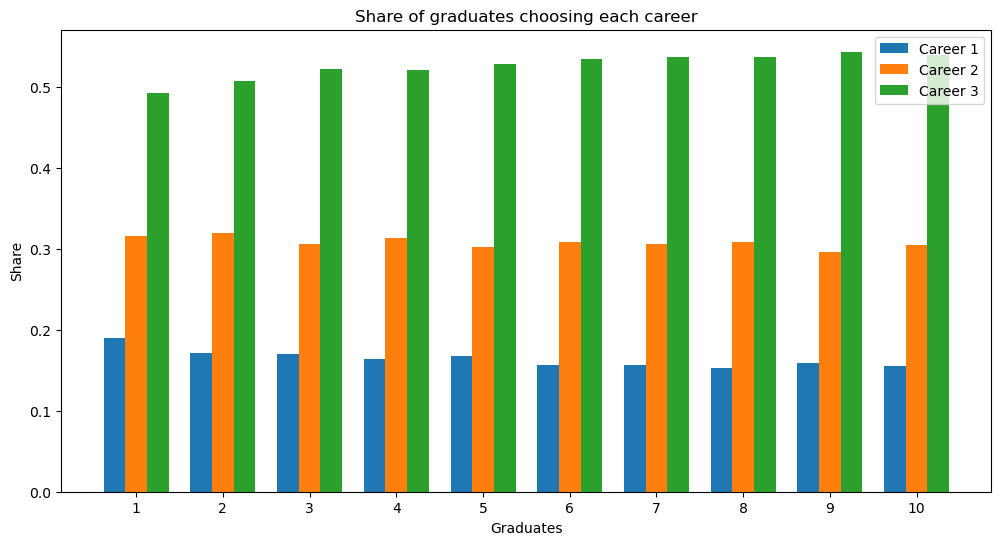

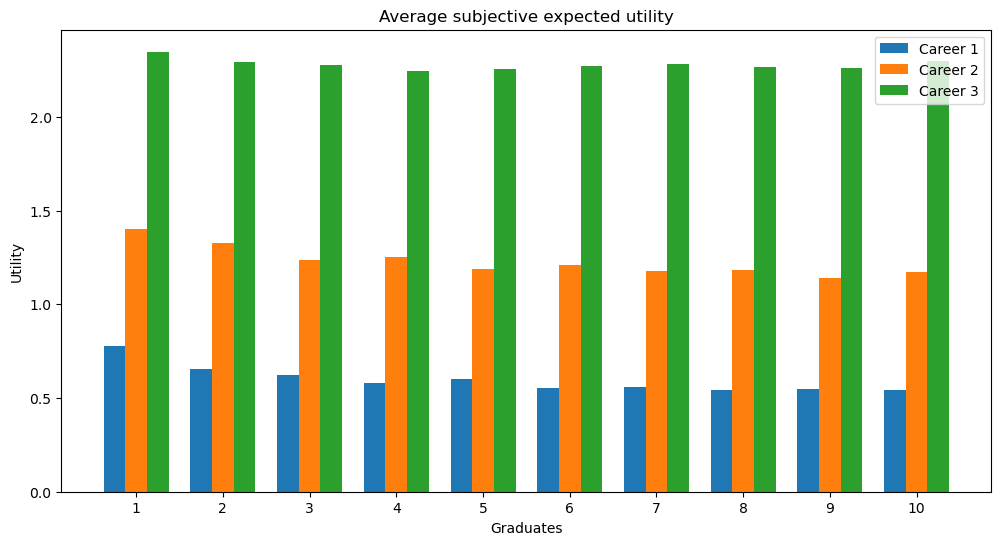

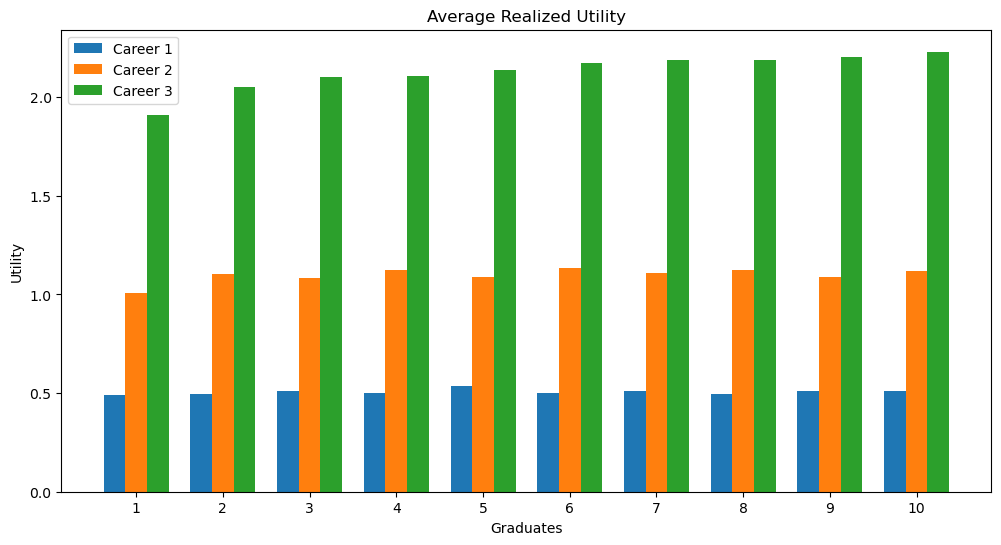

In [24]:
#Step 5: Illustration of the results.
#We use our results_df to extract the data needed for plotting.
career_1_share = results_df[results_df['Career track'] == 1]['Share of choices'].values
career_2_share = results_df[results_df['Career track'] == 2]['Share of choices'].values
career_3_share = results_df[results_df['Career track'] == 3]['Share of choices'].values

career_1_expected = results_df[results_df['Career track'] == 1]['Expected utility'].values
career_2_expected = results_df[results_df['Career track'] == 2]['Expected utility'].values
career_3_expected = results_df[results_df['Career track'] == 3]['Expected utility'].values

career_1_realized = results_df[results_df['Career track'] == 1]['Realized utility'].values
career_2_realized = results_df[results_df['Career track'] == 2]['Realized utility'].values
career_3_realized = results_df[results_df['Career track'] == 3]['Realized utility'].values

#We plot share of choices for each graduate
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

x = np.arange(par.N)
ax.bar(x - width, career_1_share, width, label='Career 1')
ax.bar(x, career_2_share, width, label='Career 2')
ax.bar(x + width, career_3_share, width, label='Career 3')

ax.set_xlabel('Graduates')
ax.set_ylabel('Share')
ax.set_title('Share of graduates choosing each career')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, par.N + 1))
ax.legend()

plt.show()

#We plot the expected utility for each graduate
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

x = np.arange(par.N)
ax.bar(x - width, career_1_expected, width, label='Career 1')
ax.bar(x, career_2_expected, width, label='Career 2')
ax.bar(x + width, career_3_expected, width, label='Career 3')

ax.set_xlabel('Graduates')
ax.set_ylabel('Utility')
ax.set_title('Average subjective expected utility')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, par.N + 1))
ax.legend()

plt.show()

#We plot the realized utility for each graduate
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

x = np.arange(par.N)
ax.bar(x - width, career_1_realized, width, label='Career 1')
ax.bar(x, career_2_realized, width, label='Career 2')
ax.bar(x + width, career_3_realized, width, label='Career 3')

ax.set_xlabel('Graduates')
ax.set_ylabel('Utility')
ax.set_title('Average Realized Utility')
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, par.N + 1))
ax.legend()

plt.show()

**Conclusion**:

Most graduates show a strong preference for career track 3, as indicated by higher shares of choices, expected utilities, and realized utilities. Career track 2 is moderately preferred, while career track 1 is the least preferred across most graduates. The utilities also follow this ranking. However, the values of expected and realized utilities vary across career tracks, highlighting the personalized nature of career decisions. Therefore, even accounting for individual graduate differences and the influence of friends' noise, graduates are most likely to choose career track 3, which consistently has the highest expected and realized utility.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

We follow the same approach as in question 2 but now we add a second decision-making step after one year. We introduce a switching cost, which affects the calculation of expected utilities for the second career choice. Afterwards, we simulate a new career choice process, considering the switching cost and new noise terms. Instead of focusing on all the career tracks, we focus on the new optimal career choices after one year and displays the results for the new choices only. We includes the additional metric of the share of graduates who switch careers.

We wil follow this structure:
1. Simulation of the error terms
2. Calculating the expected utility
3. Caculating the averages
4. Displaying the new simulation results
5. Displaying the switch share results

In [11]:
#We initialize storage for new results.
new_career_choices = np.zeros((par.N, par.J))
new_expected_utilities = np.zeros((par.N, par.J))
new_realized_utilities = np.zeros((par.N, par.J))
switch_share = np.zeros(par.N)

#Step 1: Simulation of the error terms.
np.random.seed(2000)

In [12]:
#Step 2: Calculating the expected utility.
#We follow the exact same procedure as in question 2.
for i in range(par.N):
    for k in range(par.K):
        friends = np.random.normal(0, par.sigma, (par.F[i], par.J))
        utility_first = par.v + friends.mean(axis=0)
        utility_variation = np.random.normal(0, par.sigma, par.J)
        utility_total = utility_first + utility_variation
        initial_choice = np.argmax(utility_total)
        
        #We want to adjust the expected utilities for each career track to account for a switching cost
        utility_first_new = np.where(
            np.arange(par.J) != initial_choice,
            utility_first - par.c,
            utility_first
        )
        
        # Draw new own noise for second year choice
        epsilon_own_new = np.random.normal(0, par.sigma, par.J)
        u_total_new = utility_first_new + epsilon_own_new
        
        # Choose new optimal career
        new_choice = np.argmax(u_total_new)
        
        # Storing the results
        new_career_choices[i, new_choice] += 1
        new_expected_utilities[i, new_choice] += u_total_new[new_choice]
        new_realized_utilities[i, new_choice] += par.v[new_choice] + epsilon_own_new[new_choice]
        
        # Track switching behavior
        if new_choice != initial_choice:
            switch_share[i] += 1

In [13]:
# Step 3: Calculating the averages
new_career_choices_avg = new_career_choices / par.K
new_expected_utilities_avg = new_expected_utilities / par.K
new_realized_utilities_avg = new_realized_utilities / par.K
switch_share_avg = switch_share / par.K

In [14]:
# Step 4: Displaying the new simulation results
new_results = []
for i in range(par.N):
    chosen_career = np.argmax(new_career_choices_avg[i])
    new_results.append({
        'Graduate': i + 1,
        'Career Track': chosen_career + 1,
        'New Share of Choices': new_career_choices_avg[i, chosen_career],
        'New Expected Utility': new_expected_utilities_avg[i, chosen_career],
        'New Realized Utility': new_realized_utilities_avg[i, chosen_career]
    })

new_results_df = pd.DataFrame(new_results)
display(new_results_df)

,Graduate,Career Track,New Share of Choices,New Expected Utility,New Realized Utility
0,1,3,0.5065,2.254855,1.913234
1,2,3,0.5418,2.210569,2.091425
2,3,3,0.5381,2.096071,2.059159
3,4,3,0.5495,2.092898,2.128526
4,5,3,0.5664,2.144684,2.196237
5,6,3,0.5612,2.106747,2.183378
6,7,3,0.5599,2.078167,2.169116
7,8,3,0.5640,2.126525,2.228591
8,9,3,0.5696,2.126237,2.239512
9,10,3,0.5755,2.136304,2.251624


In [15]:
#Step 5: Displaying the switch share results
switch_results = [{'Graduate': i + 1, 'Switch Share': switch_share_avg[i]} for i in range(par.N)]
switch_results_df = pd.DataFrame(switch_results)
display(switch_results_df)

,Graduate,Switch Share
0,1,0.3291
1,2,0.3715
2,3,0.4003
3,4,0.4072
4,5,0.4065
5,6,0.4206
6,7,0.4279
7,8,0.4295
8,9,0.4242
9,10,0.4225


In [16]:
# Initialize storage for new results
new_career_choices = np.zeros((par.N, par.J))
new_expected_utilities = np.zeros((par.N, par.J))
new_realized_utilities = np.zeros((par.N, par.J))
switch_share = np.zeros(par.N)

# Step 1: Simulation of the error terms
np.random.seed(2000)

# Step 2: Calculating the expected utility
for i in range(par.N):
    for k in range(par.K):
        # Draw noise for friends' utilities (same as before)
        epsilon_friends = np.random.normal(0, par.sigma, (par.F[i], par.J))
        u_prior = par.v + epsilon_friends.mean(axis=0)
        
        # Draw own noise for first year choice
        epsilon_own = np.random.normal(0, par.sigma, par.J)
        u_total = u_prior + epsilon_own
        initial_choice = np.argmax(u_total)
        
        # Calculate utilities with switching cost
        u_prior_new = np.where(
            np.arange(par.J) != initial_choice,
            u_prior - par.c,
            u_prior
        )
        
        # Draw new own noise for second year choice
        epsilon_own_new = np.random.normal(0, par.sigma, par.J)
        u_total_new = u_prior_new + epsilon_own_new
        
        # Choose new optimal career
        new_choice = np.argmax(u_total_new)
        
        # Storing the results
        new_career_choices[i, new_choice] += 1
        new_expected_utilities[i, new_choice] += u_total_new[new_choice]
        new_realized_utilities[i, new_choice] += par.v[new_choice] + epsilon_own_new[new_choice]
        
        # Track switching behavior
        if new_choice != initial_choice:
            switch_share[i] += 1

# Step 3: Calculating the averages
new_career_choices_avg = new_career_choices / par.K
new_expected_utilities_avg = new_expected_utilities / par.K
new_realized_utilities_avg = new_realized_utilities / par.K
switch_share_avg = switch_share / par.K

# Step 4: Displaying the results
# New simulation results
new_results = []
for i in range(par.N):
    chosen_career = np.argmax(new_career_choices_avg[i])
    new_results.append({
        'Graduate': i + 1,
        'Career Track': chosen_career + 1,
        'New Share of Choices': new_career_choices_avg[i, chosen_career],
        'New Expected Utility': new_expected_utilities_avg[i, chosen_career],
        'New Realized Utility': new_realized_utilities_avg[i, chosen_career]
    })

new_results_df = pd.DataFrame(new_results)
display(new_results_df)

# Display switch share results
switch_results = [{'Graduate': i + 1, 'Switch Share': switch_share_avg[i]} for i in range(par.N)]
switch_results_df = pd.DataFrame(switch_results)
display(switch_results_df)

,Graduate,Career Track,New Share of Choices,New Expected Utility,New Realized Utility
0,1,3,0.5065,2.254855,1.913234
1,2,3,0.5418,2.210569,2.091425
2,3,3,0.5381,2.096071,2.059159
3,4,3,0.5495,2.092898,2.128526
4,5,3,0.5664,2.144684,2.196237
5,6,3,0.5612,2.106747,2.183378
6,7,3,0.5599,2.078167,2.169116
7,8,3,0.5640,2.126525,2.228591
8,9,3,0.5696,2.126237,2.239512
9,10,3,0.5755,2.136304,2.251624


,Graduate,Switch Share
0,1,0.3291
1,2,0.3715
2,3,0.4003
3,4,0.4072
4,5,0.4065
5,6,0.4206
6,7,0.4279
7,8,0.4295
8,9,0.4242
9,10,0.4225


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here